<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Planejamento de Experimentos
</h1>


# <font color='red' style='font-size: 30px;'>1.0 Introdução   </font>
<hr style='border: 2px solid red;'>




<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> “Chamar um especialista em estatística depois que o experimento foi feito pode ser o mesmo que pedir para ele fazer um exame post-mortem. Talvez ele consiga dizer do que foi que o experimento morreu.”  </i>     
</p>    

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: right; text-indent: 0px;'>    
    <b>Sir Ronald Fisher</b>  

<hr>






# <font color='red' style='font-size: 30px;'> Introdução à análise de experimentos   </font>
<hr style='border: 2px solid red;'>

# <font color = 'purple'> Inserindo o experimento num Data Frame </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

## Importando as bibliotecas

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

### Pandas

https://pandas.pydata.org/

In [2]:
import pandas as pd

C:\Users\danie\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Numpy

http://www.numpy.org/

In [3]:
import numpy as np



<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Ensaios realizados na forma normalizada</b>


<img width='800px' src='/content/Figura_2.png'>




   
    


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
<font color="MidnightBlue"> Construindo uma matriz representando todos os ensaios realizados:


In [4]:
# manual porém tem uma biblioteca que faz isso pyDOE2
ensios = np.array([
    [-1,-1],
    [1,-1],
    [-1,1],
    [1,1],
    ])

### pyDOE2

https://pypi.org/project/pyDOE2/

In [5]:
!pip install pyDOE2

In [6]:
import pyDOE2 as doe

## Costruindo um planejamento fatorial de 2²


In [7]:
ensaios = doe.ff2n(2)

In [8]:
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

## Incerindo o planejamento em um Data Frame

In [9]:
experimento = pd.DataFrame(ensaios, columns = ['Farinha', 'Chocolate'])

In [10]:
experimento

,Farinha,Chocolate
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


### Inserindo coluna com os resultados

In [11]:
experimento['Porcoes'] = [19,37,24,49]

In [12]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


<hr>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="MidnightBlue"> <b>Conclusão:</b> Temos, por fim, nosso experimento representado por um <i>DataFrame</i> do Pandas. Usaremos este <i>DataFrame</i> para iniciarmos a análise do nosso experimento.
    
<hr>   

# <font color = 'purple'> Analisando graficamente o experimento   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

###  Importando o Seaborn

https://seaborn.pydata.org

In [13]:
import seaborn as sns

In [14]:
# paletas -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('terrain')

# estilo -> white, dark, whitegrid, darkgrid, ticks


### Para a farinha

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


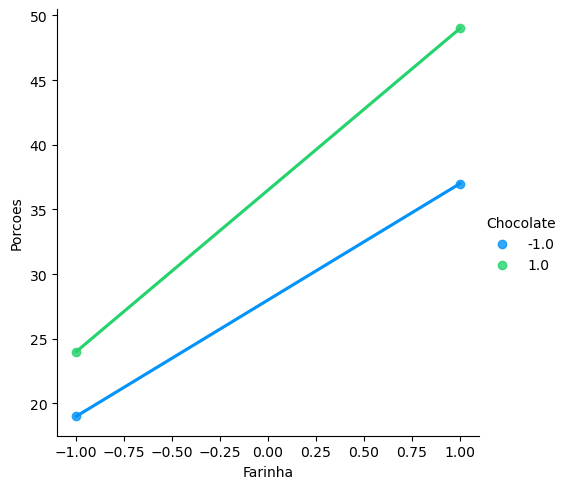

In [15]:
ax1 = sns.lmplot(data = experimento, x = 'Farinha', y = 'Porcoes', ci  = None, hue = 'Chocolate')


C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


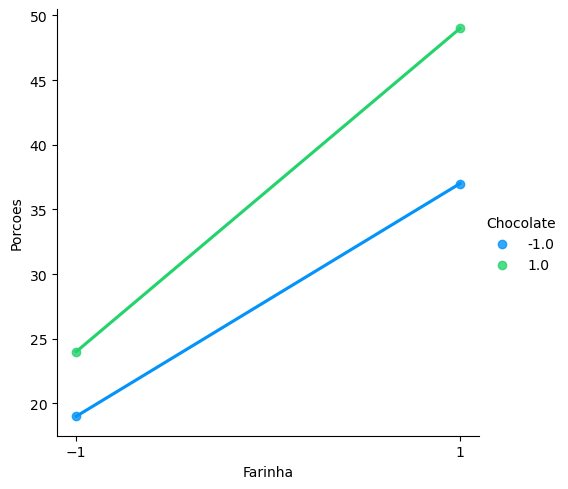

In [16]:
ax1 = sns.lmplot(data = experimento, x = 'Farinha', y = 'Porcoes', ci  = None, hue = 'Chocolate')

ax1.set(xticks = (-1,1))

### Para o chocolate

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


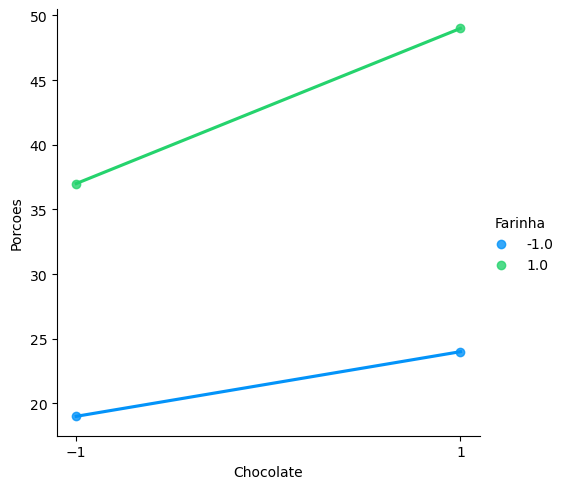

In [17]:
ax2 = sns.lmplot(data = experimento, x = 'Chocolate', y = 'Porcoes', ci = None, hue = 'Farinha')
ax2.set(xticks = (-1,1))

# <font color = 'purple'> Ajustando o modelo estatístico </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

<hr>

<img width='800px' src='figuras/Figura_3.png'>

<p style='margin: 30px 30px;'>

<hr>


### Bibliotecas  Stats Model


In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [19]:
experimento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Farinha    4 non-null      float64
 1   Chocolate  4 non-null      float64
 2   Porcoes    4 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 228.0 bytes


In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Ajustar o modelo de regressão linear sem a interação
modelo_simples = smf.ols(formula='Porcoes ~ Farinha + Chocolate', data=experimento)
modelo_ajustado_simples = modelo_simples.fit()
print(modelo_ajustado_simples.summary())


                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     21.82
Date:                Tue, 20 Feb 2024   Prob (F-statistic):              0.150
Time:                        20:50:45   Log-Likelihood:                -7.9142
No. Observations:                   4   AIC:                             21.83
Df Residuals:                       1   BIC:                             19.99
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.2500      1.750     18.429      0.0

C:\Users\danie\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### .

In [21]:
# Ajustar o modelo de regressão linear
modelo = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')
modelo_ajustado = modelo.fit()

In [22]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 20 Feb 2024   Prob (F-statistic):                nan
Time:                        20:50:45   Log-Likelihood:                 126.02
No. Observations:                   4   AIC:                            -244.0
Df Residuals:                       0   BIC:                            -246.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        in

C:\Users\danie\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\danie\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\danie\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\danie\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\danie\anaconda3\Lib\site-packages\statsmodels\base\model.py:1529: RuntimeWarning: invalid value encountered in multiply
  cov_

# <font color = 'purple'> Aumentando os Graus de liberdade  </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>



<p style='margin: 30px 30px;'>     
    


<hr>


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Replicatas no centro</b>


<img width='800px' src='figuras/Figura_5.png'>


<p style='margin: 30px 30px;'>
    
    

    

    
<hr>    

In [23]:
centro = np.array([
    [0,0,29],
    [0,0,30],
    [0,0,29],
    [0,0,30]
])

In [24]:
centro_dataframe = pd.DataFrame(centro,columns = ['Farinha','Chocolate', 'Porcoes'],index = [4,5,6,7] )

In [25]:
centro_dataframe

,Farinha,Chocolate,Porcoes
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


In [26]:
#!pip install --upgrade pandas

### .

In [27]:
experimento = experimento.append(centro_dataframe)

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
experimento

NameError: name 'exeperimento' is not defined

# <font color = 'purple'>  Análise de significância estatística   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [ ]:
modelo = smf.ols(data = experimento, formula ='Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [ ]:
modelo_ajustado = modelo.fit()

In [ ]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 20 Feb 2024   Prob (F-statistic):                nan
Time:                        23:07:19   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        na

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:957: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:50: RuntimeWarning: invalid value encountered in scalar divide
  dw =

<p style='margin: 200px 200px;'>    


<hr>


    
 <img width='400px' src='figuras/Figura_6.png'>


<p style='margin: 30px 30px;'>    

<hr>


 <img width='600px' src='figuras/Figura_7.png'>


<p style='margin: 30px 30px;'>        
    
    
 <hr>   
    

  
 <img width='600px' src='figuras/Figura_10.png'>


<p style='margin: 30px 30px;'>       
  
<hr>        


# <font color = 'purple'> Teste de significância estatística usando o <b>t<b>    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>





<hr>
<img width='600px' src='figuras/Figura_11.png'>


<hr>
  <p style='margin: 30px 30px;'>     
<img width='900px' src='figuras/Figura_8.png'>


<hr>



<p style='margin: 150px 150px;'>     
<img width='1000px' src='figuras/Figura_20.png'



<hr>
<p style='margin: 150px 150px;'>    

In [ ]:
t_valores = modelo_ajustado.tvalues

In [ ]:
t_valores

Intercept           NaN
Farinha             NaN
Chocolate           NaN
Farinha:Chocolate   NaN
dtype: float64

In [ ]:
nome = t_valores.index.tolist()

In [ ]:
nome

['Intercept', 'Farinha', 'Chocolate', 'Farinha:Chocolate']

### .

### .


### Plotando o gráfico

Text(0.5, 0, 't-valores')

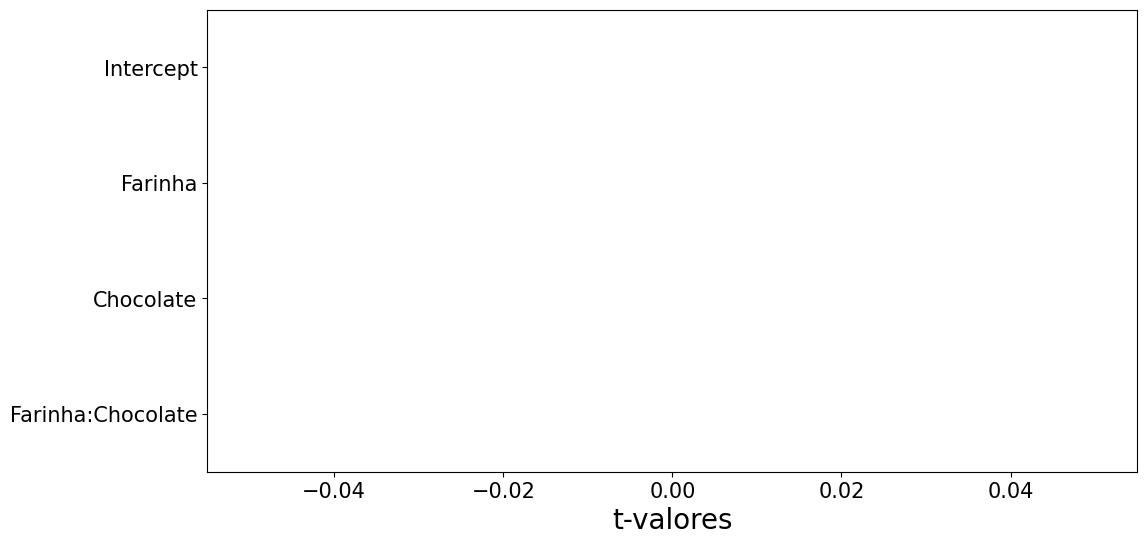

In [ ]:
pareto = sns.barplot(x = t_valores, y= nome)
pareto.figure.set_size_inches(12,6)
pareto.tick_params(labelsize = 15)
pareto.set_xlabel('t-valores',fontsize = 20)

# <font color = 'purple'> Propondo um novo modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<hr>

<img width='800px' src='figuras/Figura_3.png'>

<p style='margin: 30px 30px;'>

<hr>

<p style='margin: 200px 200px;'>


<hr>

<img width='600px' src='figuras/Figura_9.png'>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>


<p style='margin: 30px 30px;'>

    
<hr>    


In [ ]:
from scipy import stats

In [ ]:
distribuicao = stats.t(df = 4)

In [ ]:
distribuicao.ppf(q = 1 - 0.025)

2.7764451051977987

<hr>

# <font color = 'purple'> Gráfico Padronizado de Pareto do novo modelo    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


In [ ]:
limite = [distribuicao.ppf(q = 1- 0.025)]*len(nome)

In [ ]:
limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

### .

### Plotando o gráfico

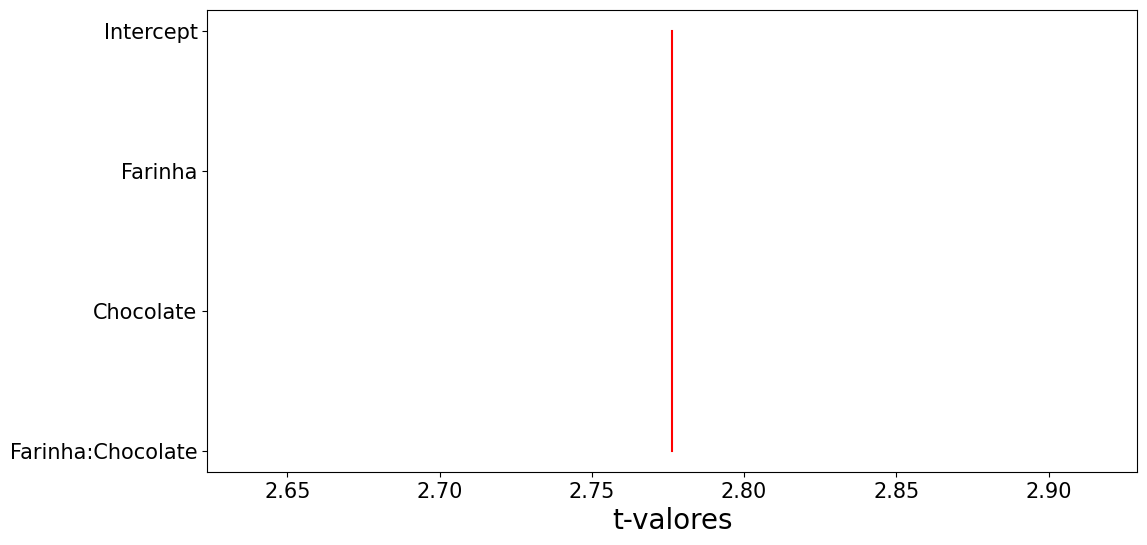

In [ ]:
pareto = sns.barplot(x = t_valores, y= nome)
pareto.figure.set_size_inches(12,6)
pareto.tick_params(labelsize = 15)
pareto.set_xlabel('t-valores',fontsize = 20)

pareto.plot(limite, nome, 'r')


<font color='red' style='font-size: 30px;'> Preditos por observados  </font>
<hr style='border: 2px solid red;'>

### .

### .

<hr>

### .

# <font color = 'purple'> Explorando o modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

### .

### Definindo a função


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='figuras/Figura_22.png'>


<hr>

# <font color = 'purple'> Mapa de cores   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='figuras/Figura_23.jpg'>

#### Fonte: National Centers for Environmental Prediction


<hr>



<p style='margin: 50px 50px;'>




<p style='margin: 150px 150px;'>


<hr>

<img width='600px' src='figuras/Figura_24.png'>


<hr>



<p style='margin: 30px 30px;'>

### .

### .

### Construindo a superfície de resposta

https://matplotlib.org/users/colormaps.html